In [2]:
import sqlalchemy

In [3]:
engine = sqlalchemy.create_engine('sqlite:///../../data/COMPAS/compas.db')

In [4]:
inspector = sqlalchemy.inspect(engine)

In [5]:
inspector.get_table_names()

['casearrest',
 'charge',
 'compas',
 'jailhistory',
 'people',
 'prisonhistory',
 'summary']

In [6]:
cursor = engine.execute('SELECT * FROM compas LIMIT 10')

In [7]:
cursor.fetchall()

[(1, 'miguel', 'hernandez', 56418, 58393, 64352, 'PRETRIAL', 'Risk and Prescreen', 'Intake', 'Pretrial', 'Jail Inmate', 'Single', '2013-08-14 00:00:00.000000', 1, 'Low', 'Low', 7, 'Risk of Violence', -4.31, 1, 1),
 (2, 'miguel', 'hernandez', 56418, 58393, 64352, 'PRETRIAL', 'Risk and Prescreen', 'Intake', 'Pretrial', 'Jail Inmate', 'Single', '2013-08-14 00:00:00.000000', 1, 'Low', 'Low', 8, 'Risk of Recidivism', -2.78, 1, 1),
 (3, 'miguel', 'hernandez', 56418, 58393, 64352, 'PRETRIAL', 'Risk and Prescreen', 'Intake', 'Pretrial', 'Jail Inmate', 'Single', '2013-08-14 00:00:00.000000', 1, 'Low', 'Low', 18, 'Risk of Failure to Appear', 13, 1, 1),
 (4, 'michael', 'ryan', 68603, 72042, 79669, 'PRETRIAL', 'Risk and Prescreen', 'Intake', 'Pretrial', 'Jail Inmate', 'Single', '2014-12-31 00:00:00.000000', 1, 'Low', 'Low', 7, 'Risk of Violence', -2.75, 2, 2),
 (5, 'michael', 'ryan', 68603, 72042, 79669, 'PRETRIAL', 'Risk and Prescreen', 'Intake', 'Pretrial', 'Jail Inmate', 'Single', '2014-12-31 0

In [8]:
import pandas

In [9]:
people = pandas.read_sql('people', engine)

In [10]:
people.head()

,id,name,first,last,sex,race,dob,age,age_cat,juv_fel_count,...,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc
0,1,miguel hernandez,miguel,hernandez,Male,Other,1947-04-18,69,Greater than 45,0,...,NaT,None,NaT,NaT,0,None,None,None,NaT,None
1,2,michael ryan,michael,ryan,Male,Caucasian,1985-02-06,31,25 - 45,0,...,NaT,None,NaT,NaT,0,None,None,None,NaT,None
2,3,kevon dixon,kevon,dixon,Male,African-American,1982-01-22,34,25 - 45,0,...,2013-07-05,Felony Battery (Dom Strang),NaT,NaT,1,None,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang)
3,4,ed philo,ed,philo,Male,African-American,1991-05-14,24,Less than 25,0,...,2013-06-16,Driving Under The Influence,2013-06-16 09:05:47,2013-06-16 07:18:55,0,None,None,None,NaT,None
4,5,marcu brown,marcu,brown,Male,African-American,1993-01-21,23,Less than 25,0,...,NaT,None,NaT,NaT,0,None,None,None,NaT,None


In [11]:
people.columns

Index(['id', 'name', 'first', 'last', 'sex', 'race', 'dob', 'age', 'age_cat',
       'juv_fel_count', 'juv_misd_count', 'juv_other_count',
       'compas_screening_date', 'decile_score', 'score_text', 'violent_recid',
       'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out',
       'c_case_number', 'c_days_from_compas', 'c_arrest_date',
       'c_offense_date', 'c_charge_degree', 'c_charge_desc', 'is_recid',
       'num_r_cases', 'r_case_number', 'r_charge_degree', 'r_days_from_arrest',
       'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out',
       'is_violent_recid', 'num_vr_cases', 'vr_case_number',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc'],
      dtype='object')

In [12]:
compas = pandas.read_sql('compas', engine)

In [13]:
compas.head()

,id,first,last,compas_person_id,compas_case_id,compas_assessment_id,agency_text,scale_set,assessment_reason,legal_status,...,marital_status,screening_date,rec_supervision_level,rec_supervision_level_text,score_text,scale_id,type_of_assessment,raw_score,decile_score,person_id
0,1,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-08-14,1,Low,Low,7,Risk of Violence,-4,1,1
1,2,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-08-14,1,Low,Low,8,Risk of Recidivism,-2,1,1
2,3,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-08-14,1,Low,Low,18,Risk of Failure to Appear,13,1,1
3,4,michael,ryan,68603,72042,79669,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2014-12-31,1,Low,Low,7,Risk of Violence,-2,2,2
4,5,michael,ryan,68603,72042,79669,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2014-12-31,1,Low,Medium,8,Risk of Recidivism,0,5,2


In [14]:
compas.columns

Index(['id', 'first', 'last', 'compas_person_id', 'compas_case_id',
       'compas_assessment_id', 'agency_text', 'scale_set', 'assessment_reason',
       'legal_status', 'custody_status', 'marital_status', 'screening_date',
       'rec_supervision_level', 'rec_supervision_level_text', 'score_text',
       'scale_id', 'type_of_assessment', 'raw_score', 'decile_score',
       'person_id'],
      dtype='object')

In [15]:
# In this setting we are interested mainly in whether the score $a$ we have given indidivuals is fair with respect to their sensitive attribute $z$ and their underlying quality $y$, i.e. whether or not recidivism occurred.
df = pandas.read_sql('''SELECT race,
                        is_violent_recid,
                        agency_text,
                        compas.score_text FROM people JOIN compas ON person_id = people.id''', engine)

In [16]:
df.head()

,race,is_violent_recid,agency_text,score_text
0,Other,0,PRETRIAL,Low
1,Other,0,PRETRIAL,Low
2,Other,0,PRETRIAL,Low
3,Caucasian,0,PRETRIAL,Low
4,Caucasian,0,PRETRIAL,Medium


In [17]:
counts = df.groupby(['race', 'is_violent_recid']).score_text.value_counts()

In [18]:
counts

race              is_violent_recid  score_text
African-American  0                 Low           9757
                                    Medium        4317
                                    High          2847
                                    N/A              8
                  1                 Low            819
                                    Medium         635
                                    High           595
Asian             0                 Low            141
                                    Medium          20
                                    High             7
                  1                 Low              5
                                    Medium           5
                                    High             2
Caucasian         0                 Low           8869
                                    Medium        2139
                                    High           918
                                    N/A             11
                  

In [19]:
relative_counts = pandas.DataFrame(
    {i: d.score_text.value_counts() / d.score_text.count()
     for i, d in df.groupby(['race', 'is_violent_recid'])})
relative_counts

African-American               Asian           Caucasian            \
                      0         1         0         1         0         1   
High           0.168173  0.290386  0.041667  0.166667  0.076904  0.142686   
Low            0.576348  0.399707  0.839286  0.416667  0.742984  0.594724   
Medium         0.255006  0.309907  0.119048  0.416667  0.179191  0.262590   
N/A            0.000473       NaN       NaN       NaN  0.000922       NaN   

        Hispanic           Native American               Other            
               0         1               0         1         0         1  
High    0.065251  0.159204        0.117117  0.277778  0.025402  0.191489  
Low     0.780240  0.621891        0.711712  0.388889  0.855365  0.666667  
Medium  0.154509  0.218905        0.171171  0.333333  0.118196  0.141844  
N/A          NaN       NaN             NaN       NaN  0.001037       NaN

In [20]:
%matplotlib inline

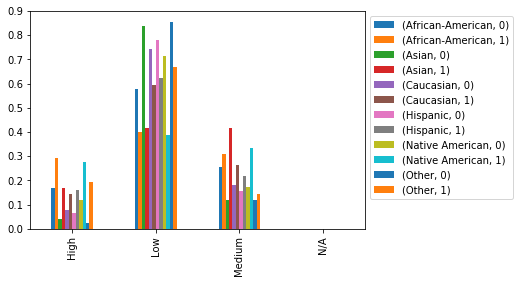

In [21]:
relative_counts.plot.bar().legend(bbox_to_anchor = (1,1))

In [22]:
from statsmodels.formula.api import Logit, logit, mnlogit

In [23]:
df['scored_high'] = 0 + (df.score_text == 'High')

In [24]:
model = logit('scored_high ~ race + is_violent_recid + agency_text', df)

In [25]:
fitted_model = model.fit()

In [26]:
fitted_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                  Logit              No. Iterations:     7.0000    
Dependent Variable:     scored_high        Pseudo R-squared:   0.048     
Date:                   2018-10-04 12:21   AIC:                27464.5164
No. Observations:       37578              BIC:                27549.8581
Df Model:               9                  Log-Likelihood:     -13722.   
Df Residuals:           37568              LL-Null:            -14407.   
Converged:              1.0000             Scale:              1.0000    
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Intercept                -0.9779   0.2302  -4.2476 0.0000 -1.4291 -0.5266
race[T.Asian]            -1.4142   0.3431  -4.1218 0.0000 -2.0867 -0.7417
race[T.Caucasian]        -0.8806   0.0377 -23.3739 0.0000 -0.9544 -0.8067
race[T.Hispanic]         -1.0405   0.0693 -15.0078 0.0000 -1.1764 -0.9046
race[T.Native American]  -0.3605   0.2564  -1.4063 0.1596 -0.8630  0.1419
race[T.Other]            -1.7172   0.1186 -14.4776 0.0000 -1.9497 -1.4848
agency_text[T.DRRD]       0.2336   0.2937   0.7952 0.4265 -0.3421  0.8093
agency_text[T.PRETRIAL]  -0.6537   0.2305  -2.8358 0.0046 -1.1055 -0.2019
agency_text[T.Probation] -0.2184   0.2415  -0.9047 0.3656 -0.6917  0.2548
is_violent_recid          0.7479   0.0453  16.5145 0.0000  0.6591  0.8367
=========================================================================

"""

# Conditional independence

Here you should try and measure the conditional independence of your model $P$ with respect to the sensitive variable (race). In particular, we wish to calculate the dependence of the risk classification $a$ on race $z$ given their recidivism $y$:
$$D(P(a \mid y, z), P(a \mid y)),$$
which corresponds to the policy for selecting the scores being balanced. We also wish to calculate the dependence of recidivism $y$ on race $z$ given the risk $a$:
$$D(P(y \mid a, z), P(y \mid a)),$$
which corresponds to the policy for selecting the scores being calibrated.

Here $D$ is some appropriate distance or divergence between distributions. It is suggested to use one of:

1. Total variation https://en.wikipedia.org/wiki/Total_variation_distance_of_probability_measures 
2. KL divergence https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence or 
3. $1/2$-Renyi-divergence https://en.wikipedia.org/wiki/R%C3%A9nyi_entropy#R%C3%A9nyi_divergence

Does the policy look fair with respect to either one of those metrics?


In [27]:
p_a_yz = pandas.DataFrame(
    {i: d.score_text.value_counts() / d.score_text.count()
     for i, d in df.groupby(['race', 'is_violent_recid'])})
p_a_yz

African-American               Asian           Caucasian            \
                      0         1         0         1         0         1   
High           0.168173  0.290386  0.041667  0.166667  0.076904  0.142686   
Low            0.576348  0.399707  0.839286  0.416667  0.742984  0.594724   
Medium         0.255006  0.309907  0.119048  0.416667  0.179191  0.262590   
N/A            0.000473       NaN       NaN       NaN  0.000922       NaN   

        Hispanic           Native American               Other            
               0         1               0         1         0         1  
High    0.065251  0.159204        0.117117  0.277778  0.025402  0.191489  
Low     0.780240  0.621891        0.711712  0.388889  0.855365  0.666667  
Medium  0.154509  0.218905        0.171171  0.333333  0.118196  0.141844  
N/A          NaN       NaN             NaN       NaN  0.001037       NaN

In [45]:
p_a_y = pandas.DataFrame(
    {i: d.score_text.value_counts() / d.score_text.count()
     for i, d in df.groupby(['is_violent_recid'])})
p_a_y

,0,1
High,0.117880,0.239631
Low,0.671008,0.474962
Medium,0.210500,0.285407
N/A,0.000612,NaN


$$D_{KL}(Q\|P) = \sum_iQ(i)\ln\Big(\frac{Q(i)}{P(i)}\Big)$$
$$D_{KL}(P(a|y,z)\|P(a|y)) = \sum_{i\in\{High, Medium, Low\}}\sum_{j\in\{0,1\}}P(a=i|y=j,z=AA)\ln\Big(\frac{P(a=i|y=j,z=AA)}{P(a=i|y=j)}\Big)$$

In [55]:
z = 'African-American'
D_KL = 0
for i in ('High', 'Medium', 'Low'):
    for j in (0,1):
        D_KL += p_a_yz[z, j][i] * np.log(p_a_yz[z, j][i] / p_a_y[j][i])
    print(D_KL)
D_KL

0.11554134986806117
0.1899747340856093
0.0333800741892749


0.0333800741892749

#### Now trying to calculate using the method from ci_test.py

In [57]:
# z is race, African-American or otherwise
# y is recidivism
# a is classification, High / Low, 1 / 0
df.head()

,race,is_violent_recid,agency_text,score_text,scored_high
0,Other,0,PRETRIAL,Low,0
1,Other,0,PRETRIAL,Low,0
2,Other,0,PRETRIAL,Low,0
3,Caucasian,0,PRETRIAL,Low,0
4,Caucasian,0,PRETRIAL,Medium,0


In [61]:
df['z'] = df['race']=='African-American'

In [64]:
def marginal_posterior(data, alpha, beta):
    n_data = len(data)
    total_probability = 1
    log_probability = 0
    for t in range(n_data):
        p = alpha / (alpha + beta)
        if (data[t] > 0):
            #total_probability *= p
            log_probability += np.log(p)
            alpha += 1
        else:
            #total_probability *= (1 - p)
            log_probability += np.log(1 - p)
            beta +=1
    return np.exp(log_probability)

In [72]:
Z = np.array([1 if z else -1 for z in df['z'].values])
Y = np.array([1 if y else -1 for y in df['is_violent_recid'].values])
A = np.array([1 if a else -1 for a in df['scored_high'].values])

In [74]:
from scipy.stats import beta
import matplotlib.pyplot as plt

y:  -1 Deviation:  0.099241142078055
Calculate the marginals for each model
Marginal likelihoods:  0.0 0.0 0.0
Now calculate a posterior distribution for the relevant Bernoulli parameter. Focus on just one value of y for simplicity
y:  1 Deviation:  0.13698588560370425
Calculate the marginals for each model
Marginal likelihoods:  0.0 8.957937425637283e-227 0.0
Now calculate a posterior distribution for the relevant Bernoulli parameter. Focus on just one value of y for simplicity


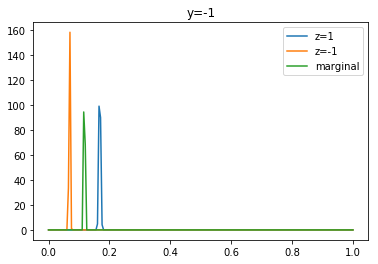

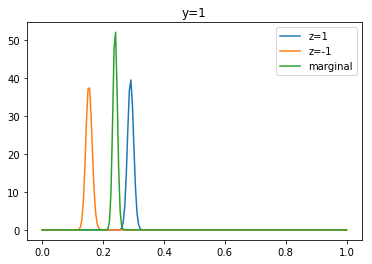

In [76]:
n_figures = 0
for y in [-1, 1]:
    ## P(A | Y, Z = 1)
    positive = (Y==y) & (Z==1)
    positive_alpha = sum(A[positive]==1)
    positive_beta = sum(A[positive]==-1)
    positive_ratio = positive_alpha / (positive_alpha + positive_beta)

    ## P(A | Y, Z = - 1)
    negative = (Y==y) & (Z==-1)
    negative_alpha = sum(A[negative]==1)
    negative_beta = sum(A[negative]==-1)
    negative_ratio = negative_alpha / (negative_alpha + negative_beta)

    print("y: ", y, "Deviation: ", abs(positive_ratio - negative_ratio))

    print ("Calculate the marginals for each model")
    P_D_positive = marginal_posterior(A[positive], 1, 1)
    P_D_negative = marginal_posterior(A[negative], 1, 1)
    P_D = marginal_posterior(A[(Y==y)], 1, 1)

    print("Marginal likelihoods: ", P_D, P_D_negative, P_D_positive)
    ## Now you need to calculate the probability of either the
    ## dependent or independent model by combining all of the above
    ## into a single number.  This is not completely trivial, as you
    ## need to combine the negative and positive Z into it, but I
    ## think you can all work it out.


    print ("Now calculate a posterior distribution for the relevant Bernoulli parameter. Focus on just one value of y for simplicity")


    # First plot the joint distribution
    prior_alpha = 1
    prior_beta = 1
    xplot = np.linspace(0, 1, 200)
    pdf_p = beta.pdf(xplot, prior_alpha + positive_alpha, prior_beta + positive_beta)
    pdf_n = beta.pdf(xplot, prior_alpha + negative_alpha, prior_beta + negative_beta)
    pdf_m = beta.pdf(xplot, prior_alpha + positive_alpha + negative_alpha, prior_beta + positive_beta + negative_beta)
    n_figures+=1
    plt.figure(n_figures)
    plt.clf()
    plt.plot(xplot, pdf_p)
    plt.plot(xplot, pdf_n)
    plt.plot(xplot, pdf_m)
    plt.legend(["z=1", "z=-1", "marginal"])
    plt.title("y=" + str(y))

plt.show()

$$D_{KL}(Q\|P) = \int_{-\infty}^{\infty}Q(x)\ln\Big(\frac{Q(x)}{P(x)}\Big)dx$$
$$D_{KL}(P(a|y,z)\|P(a|y)) \approx \sum_{i}P(a|y,z)\ln\Big(\frac{P(a|y,z)}{P(a|y)}\Big)$$

In [88]:
negative_ratio

0.15339966832504145

In [78]:
# For y = 1, z = 1, a = 1 => recidivism true, classification high, race AA
D_KL = np.sum(pdf_p*np.log(pdf_p/pdf_m))
D_KL

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


nan

In [95]:
d = ([q*np.log(q/p) for p, q in zip(pdf_p/sum(pdf_p), pdf_m/sum(pdf_m)) if p > 0 and q > 0])
sum(d)

13.921504658042528

In [91]:
sum(pdf_m)

199.00000000005386